In [1]:
import petl
import psycopg2
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# suppress bullshit scipy warnings
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [5]:
conn = psycopg2.connect('dbname=nfldb')

In [6]:
qb_stats = petl.fromdb(conn, 'select * from lombardi.qb_stats')

In [7]:
qb_stats.look()

+------+------+----------------------+-------+------------+---------------+----------+-------------+
| year | week | full_name            | yards | touchdowns | interceptions | attempts | completions |
+======+======+======================+=======+============+===============+==========+=============+
| 2009 |    1 | 'Aaron Rodgers'      |   184 |          1 |             0 |       28 |          17 |
+------+------+----------------------+-------+------------+---------------+----------+-------------+
| 2009 |    1 | 'Ben Roethlisberger' |   363 |          1 |             2 |       43 |          33 |
+------+------+----------------------+-------+------------+---------------+----------+-------------+
| 2009 |    1 | 'Carson Palmer'      |   247 |          0 |             2 |       33 |          21 |
+------+------+----------------------+-------+------------+---------------+----------+-------------+
| 2009 |    1 | 'Drew Brees'         |   358 |          6 |             1 |       34 |     

In [8]:
attempts = list(qb_stats['attempts'])
completions = list(qb_stats['completions'])

att_fmt = [(x,) for x in attempts]
cmp_fmt = [(x) for x in completions]

In [9]:
a_train, a_test, c_train, c_test = train_test_split(att_fmt, cmp_fmt)

In [10]:
regr = linear_model.LinearRegression()
regr.fit(a_train, c_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

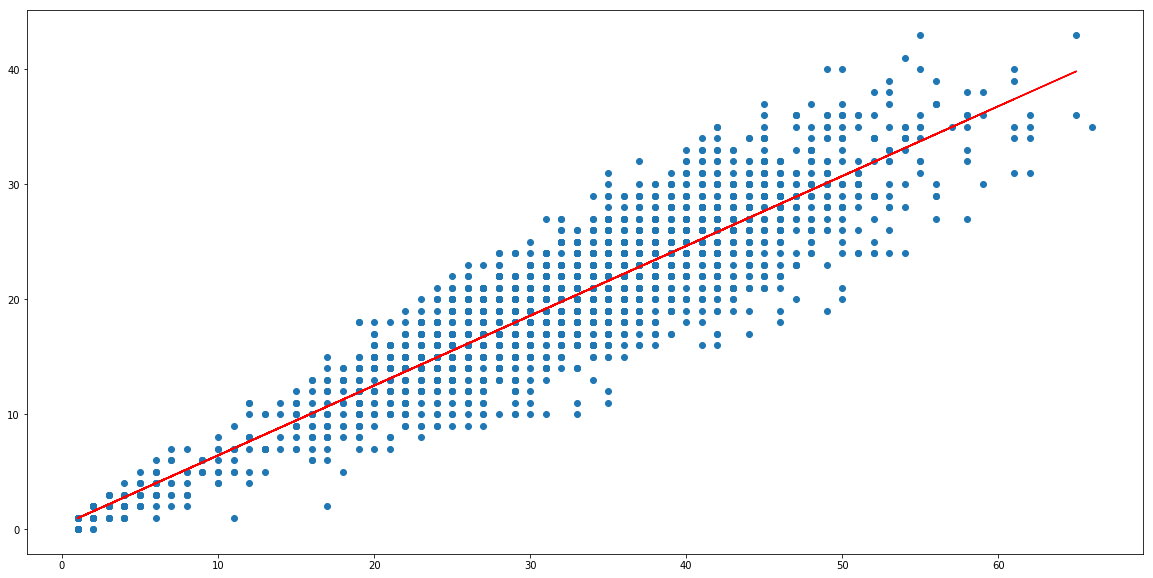

In [11]:
fig = plt.figure(figsize=(20,10))
plt.scatter(attempts, completions)
plt.plot(a_test, regr.predict(a_test), color='r')

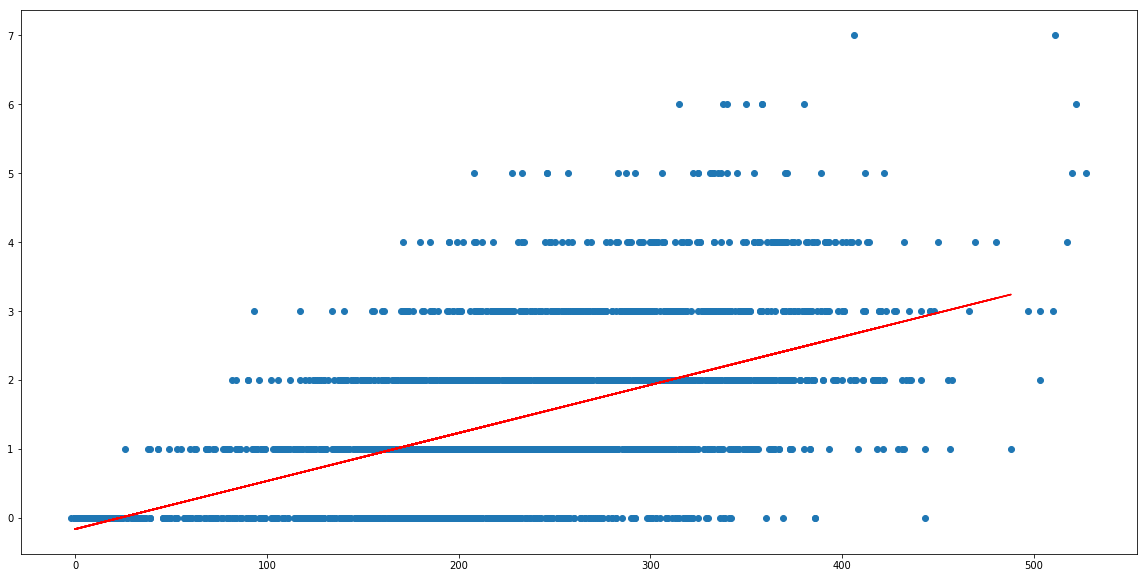

In [12]:
# get lists of x,y data
x = list(qb_stats['yards'])
y = list(qb_stats['touchdowns'])

# formatting requirements for sklearn
x_fmt = [(a,) for a in x]
y_fmt = [(a) for a in y]

# split into train and test groups
x_train, x_test, y_train, y_test = train_test_split(x_fmt, y_fmt)

# fit the data
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# plot
fig = plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.plot(x_test, regr.predict(x_test), color='r')

In [13]:
x_data = petl.listoftuples(qb_stats.cut(['yards', 'completions', 'attempts']))[1:]
y_data = petl.listoftuples(qb_stats.cut(['touchdowns']))[1:]

In [14]:
# split into train and test groups
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

# fit the data
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
regr.score(x_test, y_test)

0.3290342660255261

In [16]:
regr.coef_

array([[ 0.00931738,  0.02881946, -0.04641047]])

In [17]:
tb = qb_stats.select(lambda r: r.full_name == 'Tom Brady')

In [18]:
x_data = petl.listoftuples(tb.cut(['yards', 'completions', 'attempts']))[1:]
y_data = petl.listoftuples(tb.cut(['touchdowns']))[1:]

# split into train and test groups
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

# fit the data
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
regr.coef_

array([[ 0.01127181,  0.05378547, -0.09082073]])

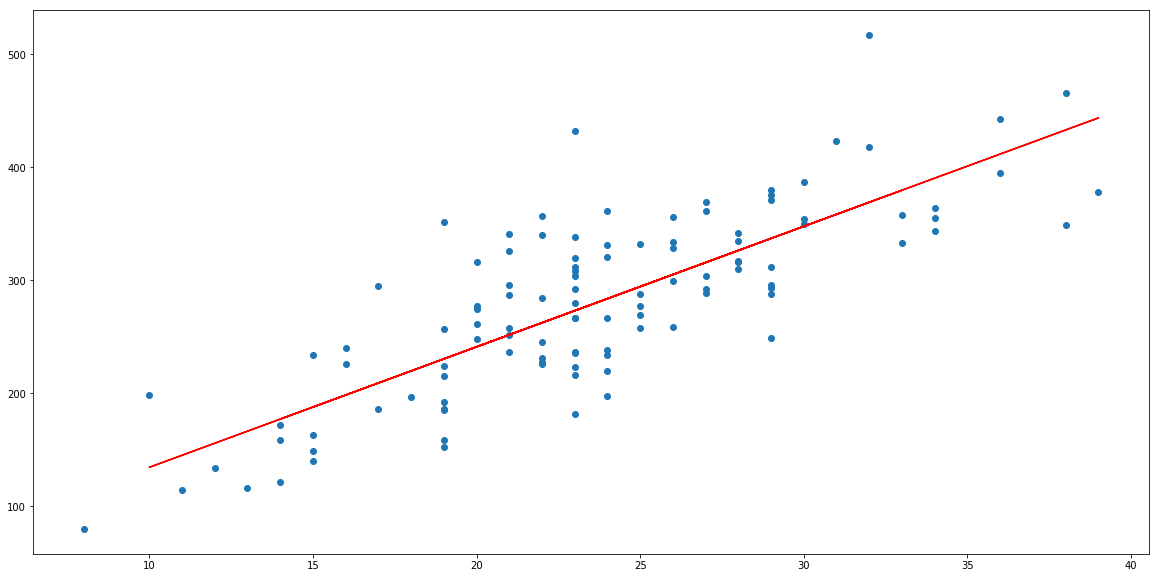

In [22]:
# get lists of x,y data
x = list(tb['completions'])
y = list(tb['yards'])

# formatting requirements for sklearn
x_fmt = [(a,) for a in x]
y_fmt = [(a) for a in y]

# split into train and test groups
x_train, x_test, y_train, y_test = train_test_split(x_fmt, y_fmt)

# fit the data
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# plot
plt.scatter(x, y)
plt.plot(x_test, regr.predict(x_test), color='r')

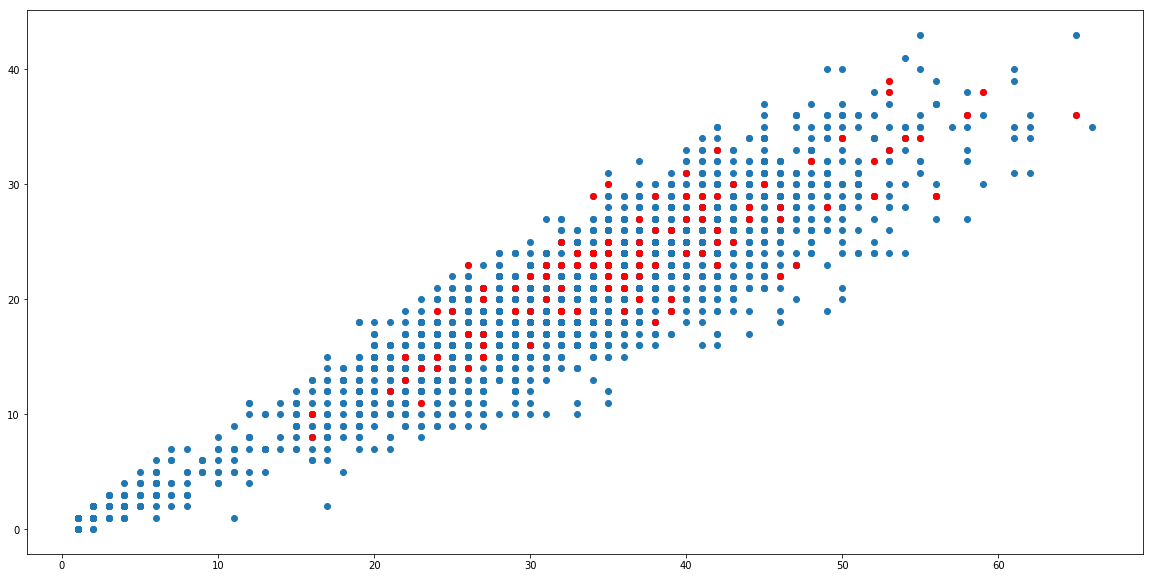

In [26]:
plt.scatter(list(qb_stats['attempts']), list(qb_stats['completions']))
plt.scatter(list(tb['attempts']), list(tb['completions']), color='r')

In [30]:
qb_aggs = petl.fromdb(conn, 'select * from lombardi.qb_aggs where num_games >= 8')

In [31]:
qb_aggs

year,full_name,avg_yds,avg_tds,avg_int,avg_cmp,avg_att,num_games
2009,Aaron Rodgers,277.13,1.88,0.44,21.88,33.81,16
2009,Alex Smith,213.64,1.64,1.09,20.45,33.82,11
2009,Ben Roethlisberger,288.53,1.73,0.80,22.47,33.73,15
2009,Carson Palmer,193.38,1.31,0.81,17.63,29.13,16
2009,Chad Henne,205.57,0.86,1.00,19.57,32.21,14


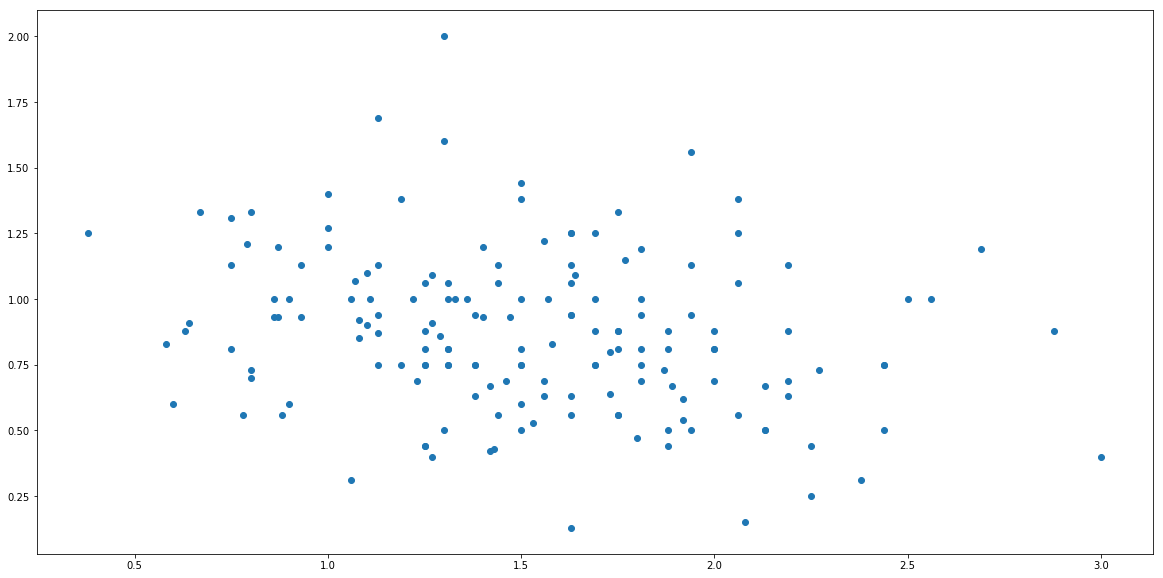

In [34]:
plt.scatter(list(qb_aggs['avg_tds']), list(qb_aggs['avg_int']))

In [49]:
from scipy import stats
import numpy as np
poi = stats.poisson

0.994700013349


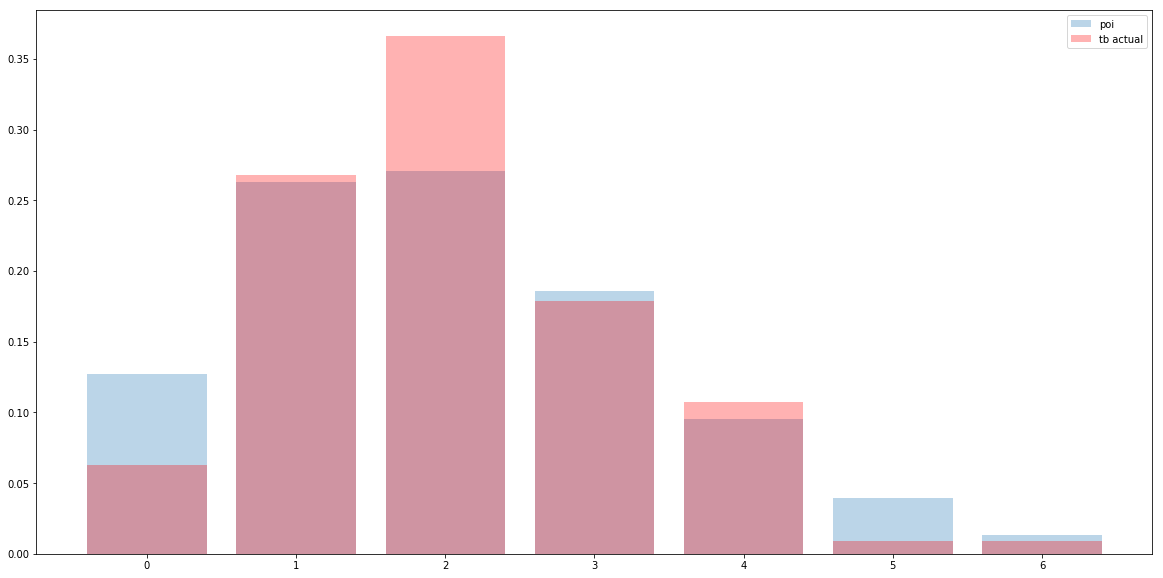

In [50]:
tb_lambda = 2.06

tb_tds = list(qb_stats.selecteq('full_name', 'Tom Brady').aggregate('touchdowns', len)['value'])

tb_tds_norm = [x / sum(tb_tds) for x in tb_tds]

a = np.arange(7)
a_poi = poi.pmf(a, tb_lambda)

print(sum(a_poi))

plt.bar(a, a_poi, alpha=0.3, label='poi')
plt.bar(a, tb_tds_norm, alpha=0.3, color='r', label='tb actual')
plt.legend()

0.999237729753


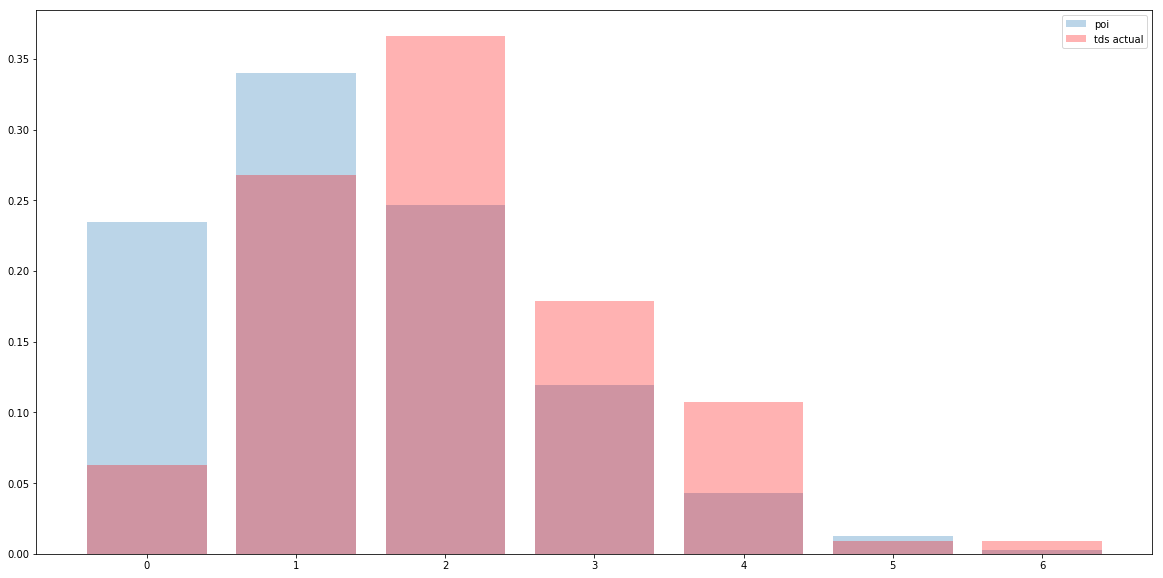

In [70]:
td_lambda = 1.45

tds = list(qb_stats.aggregate('touchdowns', len)['value'])

tds_norm = [x / sum(tds) for x in tds]

a = np.arange(7)
a_poi = poi.pmf(a, td_lambda)

print(sum(a_poi))

plt.bar(a, a_poi, alpha=0.3, label='poi')
plt.bar(a, tb_tds_norm, alpha=0.3, color='r', label='tds actual')
plt.legend()